In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [2]:
# data loading

act_path = os.getcwd()
weights = np.zeros((96,78))
delay = np.zeros((96,78))
fitness= np.zeros((96))
range_weights = 20.
range_delay = np.array([1.,10.])
range_fitness = 100.

for data_number in range(96):
    file_name = "individual_99_" + str(data_number) + "_result.csv"
    data_path = os.path.join(act_path, "csv_files_data1", file_name)
    df = pd.read_csv(data_path, delimiter=',', header=None)
    df = df.to_numpy()
    weights[data_number,:] = df[0,:]
    delay[data_number,:] = df[1,:]
    fitness[data_number] = df[2,0] 
    
fit_mean = np.mean(fitness) # to do: min, max, mean, standerd dev.
# print(fit_mean)

# numpy arrays
weights = np.clip(weights, -20., 20.)
delay = np.clip(delay, 1., 10.)
fitness = np.clip(fitness, -10000., 10000.)

# data frames for all indiviuals together
weights_df = pd.DataFrame(weights)
delay_df = pd.DataFrame(delay)
fitness_df = pd.DataFrame(fitness)

# data frames for each individual (weights + delay)
df_list = []
weights_delay = np.zeros((78,2))
for data_number in range(96):
    weights_delay[:,0] = weights[data_number, :]
    weights_delay[:,1] = delay[data_number, :]
    df_list.append(pd.DataFrame(weights_delay))

In [3]:
weights_sum = np.zeros(78)
delay_sum = np.zeros(78)

#for data_number_CSV in range(96):
 #   for data_number_indi in range(78):
  #      weights_sum[data_number_indi] += weights[data_number_CSV, data_number_indi]
   #     delay_sum[data_number_indi] += delay[data_number_CSV, data_number_indi]

weights_scaled = np.zeros((96,78))
delay_scaled = np.zeros((96,78))
for j in range(96):
    for i in range(78):
        weights_scaled[j,i] = (weights[j,i]+20)/40
        delay_scaled[j,i] =  (delay[j,i]-1)/9

Entropy_weight = np.zeros(78)
Entropy_delay = np.zeros(78)
for i in range(78):
    for j in range(96):
        if weights_scaled[j,i] != 0:
            Entropy_weight[i] -= weights_scaled[j,i] * math. log(weights_scaled[j,i])
        if delay_scaled[j,i] != 0:
            Entropy_delay[i] -= delay_scaled[j,i] * math.log(delay_scaled[j,i])

Entropy_weight *= 1/math.log(96)
Entropy_delay *= 1/math.log(96)

Weights_of_indizies_W = np.zeros(78)
Weights_of_indizies_D = np.zeros(78)
Entropy_weight_sum = 0
Entropy_delay_sum = 0
for i in range(78):
    Entropy_weight_sum += Entropy_weight[i]
    Entropy_delay_sum += Entropy_delay[i]

for i in range(78):
    Weights_of_indizies_W[i]= (1-Entropy_weight[i])/(96-Entropy_weight_sum)
    Weights_of_indizies_D[i]= (1-Entropy_delay[i])/(96-Entropy_delay_sum)

#data_merged['Weights_of_weights'] = Weights_of_indizies_W
#data_merged['Weights_of_delay'] = Weights_of_indizies_D

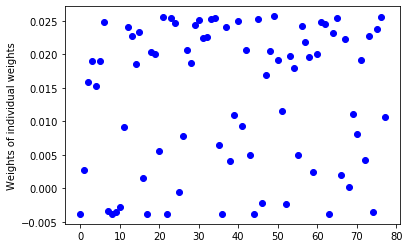

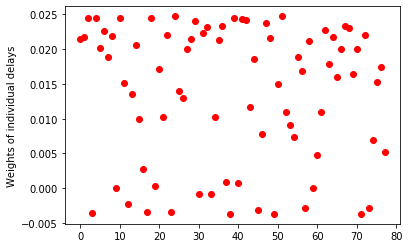

In [4]:

fig1 = plt.figure(1)
plt.plot(Weights_of_indizies_W, 'ro', marker = 'o', color ='b')
plt.ylabel('Weights of individual weights')
plt.show()
fig1_name = 'Weights_of_weight_Indizies.png'

fig2 = plt.figure(2)
fig1.savefig(fig1_name)

plt.plot(Weights_of_indizies_D, 'ro', marker = 'o', color ='r')
plt.ylabel('Weights of individual delays')
plt.show()

fig2_name = 'Weights_of_delay_Indizies.png'
fig2.savefig(fig2_name)